### Initialization

In [77]:
# Loading all the libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

### Step 1: Load data

In [78]:
# Load the data files into different DataFrames

## Plans
plans= pd.read_csv('megaline_plans.csv', sep=',')

In [79]:
## Users
users=pd.read_csv('megaline_users.csv ', sep=',')

In [80]:
## Calls
calls= pd.read_csv('megaline_calls.csv ', sep=',')

In [81]:
## Messages
messages= pd.read_csv('megaline_messages.csv ', sep=',')

In [82]:
## Internet
internet=pd.read_csv('megaline_internet.csv ', sep=',')

### Step 2: Prepare the data

#### 2.1) Plans dataframe

In [83]:
# Print the general/summary information about the plans' DataFrame

plans.info()
plans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


#### Fix data

[Fixing obvious issues with the data given the initial observations.]

In [84]:
## Convert variables to float:

plans['usd_monthly_pay'] = plans['usd_monthly_pay'].astype('float')


plans['usd_per_gb'] = plans['usd_per_gb'].astype('float')


#### Enrich data

No need to enrich any data in this data frame.

#### 2.2) Users dataframe

In [85]:
# Print the general/summary information about the users' DataFrame
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [86]:
# Print a sample of data for users

print(users.sample(20, random_state=1369)) # n=2 because only two rows

     user_id first_name  last_name  age  \
18      1018     Dennis     Grimes   70   
21      1021    Ricarda     Booker   37   
461     1461     Rupert    Santana   54   
332     1332      Lucas   Saunders   37   
379     1379    Jarrett    Spencer   34   
176     1176   Terrance    Shaffer   75   
24      1024       Yuki      Tyson   74   
445     1445     Elodia    Donovan   71   
282     1282     Annice    Calhoun   61   
444     1444     Glinda  Dickerson   70   
57      1057       Theo    Sargent   18   
36      1036      Myron      Hodge   70   
373     1373    Lindsey  Dickerson   21   
384     1384  Dominique       Good   36   
158     1158      Robin   Thornton   20   
52      1052     Edmond    Hopkins   47   
67      1067       Robt      Allen   37   
246     1246     Stevie      Moran   69   
385     1385     Nohemi   Erickson   52   
167     1167   Rebbecca  Nicholson   47   

                                                city    reg_date      plan  \
18              In

There are only missing values for churn_date. But this is a date-time format so I will not fill missing values.

reg_date and churn_date need to be converted to date-time format.

The city column should be seperated into name of city and state. There seems to be a mistake in the "MSA" and likely should be "USA". It will be easier to drop country, since this sample is from the USA.

#### Fix Data

[Fixing obvious issues with the data given the initial observations.]

In [87]:
# Check for fully duplicate rows

print(users.duplicated().sum())

0


In [88]:
## Convert to date time format

users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [89]:
## Convert to date time format

users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

#### Enrich Data

In [90]:
## Separate the city column: 

# Split the city column
users[['city', 'state_info']] = users['city'].str.split(',', expand=True)

users.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   state_info  500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 35.3+ KB


#### 2.3) Calls dataframe

In [92]:
# Print the general/summary information about the calls' DataFrame

calls.info()
#calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [93]:
# Print a sample of data for calls

print(calls.sample(10, random_state=1369)) 

              id  user_id   call_date  duration
21799   1079_512     1079  2018-10-04      0.00
88114   1324_160     1324  2018-12-18     14.40
63111    1228_35     1228  2018-12-03      0.00
65462    1237_69     1237  2018-09-02     10.57
119780  1417_433     1417  2018-08-13     10.42
25727    1099_45     1099  2018-10-27      7.68
75702   1268_206     1268  2018-03-16      8.18
89497   1326_148     1326  2018-09-23      6.09
28358   1107_164     1107  2018-11-26     12.74
4567     1020_17     1020  2018-12-03      0.33


id — unique call identifier: this is an identifier so I will convert to interger data type.

user_id: this is an identifier so I will convert to interger data type.

call_date needs to be converted ot date time type.

#### Fix data

[Fixing obvious issues with the data given the initial observations.]

In [94]:
# Check for fully duplicate rows

print(calls.duplicated().sum())

0


In [95]:
calls['id'] = calls['id'].astype('int')

In [96]:
calls['user_id'] = calls['user_id'].astype('int')

In [97]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [98]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  int32         
 1   user_id    137735 non-null  int32         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(2)
memory usage: 3.2 MB


In [99]:
## round up floating call duration to nearest interger

calls['duration'] = np.ceil(calls['duration'])

calls['duration'] = calls['duration'].astype('int')

In [100]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  int32         
 1   user_id    137735 non-null  int32         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int32         
dtypes: datetime64[ns](1), int32(3)
memory usage: 2.6 MB


#### Enrich data

In [101]:
## It may be helpful to have seperate columns for days of week, month, and year

##Day of the Week: Add a column for the day of the week
calls['day_of_week'] = calls['call_date'].dt.day_name()

##Month: Add a column for the month
calls['month'] = calls['call_date'].dt.month

##Year: Add a column for the year
calls['year'] = calls['call_date'].dt.year

In [102]:
## change duration column name to make it more descriptive

calls['call_total_minutes']= calls['duration']

## change id column to make it more descriptive
calls['number_calls']= calls['id']

In [103]:

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  137735 non-null  int32         
 1   user_id             137735 non-null  int32         
 2   call_date           137735 non-null  datetime64[ns]
 3   duration            137735 non-null  int32         
 4   day_of_week         137735 non-null  object        
 5   month               137735 non-null  int32         
 6   year                137735 non-null  int32         
 7   call_total_minutes  137735 non-null  int32         
 8   number_calls        137735 non-null  int32         
dtypes: datetime64[ns](1), int32(7), object(1)
memory usage: 5.8+ MB


#### 2.4) Messages dataframe

In [104]:
# Print the general/summary information about the messages' DataFrame

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [105]:
# Print a sample of data for messages

print(messages.sample(20, random_state=1369)) # n=2 because only two rows

              id  user_id message_date
25082    1148_85     1148   2018-12-18
3636     1037_33     1037   2018-12-28
25108   1148_129     1148   2018-12-05
50256  1328_1214     1328   2018-10-16
16147    1110_38     1110   2018-09-23
8328    1061_334     1061   2018-07-28
69600    1453_48     1453   2018-11-20
31437   1195_304     1195   2018-09-29
6119    1055_237     1055   2018-06-17
33040    1206_17     1206   2018-08-28
53189   1339_323     1339   2018-10-27
51409   1334_127     1334   2018-09-30
23264    1141_31     1141   2018-07-01
36420    1242_92     1242   2018-10-30
6832    1057_156     1057   2018-11-14
12648   1082_213     1082   2018-12-20
62858    1398_32     1398   2018-12-18
38628   1254_127     1254   2018-09-27
37401   1247_565     1247   2018-11-12
45705   1312_189     1312   2018-06-07


 ID should be converted to interger data type.
 
 message_date should be converted to date_time format.

#### Fix data

[Fixing obvious issues with the data given the initial observations.]

In [106]:
# Check for fully duplicate rows

print(messages.duplicated().sum())

0


In [107]:
# convert id to int data type
messages['id'] = messages['id'].astype('int')


In [108]:
# convert message_date to date time format

messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')


#### Enrich data

In [109]:
## It may be helpful to have seperate columns for days of week, month, and year

##Day of the Week: Add a column for the day of the week
messages['day_of_week'] = messages['message_date'].dt.day_name()

##Month: Add a column for the month
messages['month'] = messages['message_date'].dt.month

##Year: Add a column for the year
messages['year'] = messages['message_date'].dt.year

In [110]:
## change id column name to make it more descriptive

messages['number_messages']= messages['id']


#### 2.5) Internet dataframe

In [111]:
# Print the general/summary information about the internet DataFrame

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [112]:
# Print a sample of data for the internet traffic

print(internet.sample(20, random_state=1369))

              id  user_id session_date  mb_used
103534  1495_146     1495   2018-11-20   314.62
39127   1175_358     1175   2018-10-31   774.55
22563   1103_108     1103   2018-09-05    47.78
104611    1499_6     1499   2018-10-05   172.77
78112   1364_208     1364   2018-11-23     0.00
13868   1064_316     1064   2018-11-07   571.03
19017    1085_91     1085   2018-11-28   358.64
37272   1167_195     1167   2018-07-16   255.55
17849   1080_180     1080   2018-12-02   545.91
61839    1281_20     1281   2018-09-26   301.52
85972   1400_103     1400   2018-11-11   492.37
31177   1142_177     1142   2018-10-31   716.71
6065    1033_126     1033   2018-12-25   237.67
45363   1201_225     1201   2018-09-07   124.49
7380    1041_220     1041   2018-05-10   142.67
86348   1400_485     1400   2018-05-12   414.89
62739    1289_26     1289   2018-12-14   476.25
103054  1493_172     1493   2018-12-06   588.07
50538    1226_19     1226   2018-12-23   419.64
14546   1066_440     1066   2018-03-13  

id should be converted to interger data type.

session date should be converted to date time format.
 

#### Fix data

[Fixing obvious issues with the data given the initial observations.]

In [113]:
# Check for fully duplicate rows

print(internet.duplicated().sum())

0


In [114]:
## convert id to int data type
internet['id'] = internet['id'].astype('int')

In [115]:
# convert message_date to date time format

internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')


#### Enrich data

In [116]:
##Day of the Week: Add a column for the day of the week
internet['day_of_week'] = internet['session_date'].dt.day_name()

##Month: Add a column for the month
internet['month'] = internet['session_date'].dt.month

##Year: Add a column for the year
internet['year'] = internet['session_date'].dt.year

In [117]:
## change id column name to make it more descriptive

internet['mb_session']= internet['id']


In [118]:
## convert mb to gb and rounded up to nearest integer

internet['mb_used'] = internet['mb_used'] / 100

internet['mb_used']= np.ceil(internet['mb_used'])

internet['mb_used'] = internet['mb_used'].astype('int')

#### Study plan conditions

In [119]:
# Print out the plan conditions
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate


#### 3) Aggregate data per user

[Now that the data is clean, I will aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [120]:
print(calls['year'].max())
print(calls['year'].min())

print(calls['month'].max())
print(calls['month'].min())

2018
2018
12
1


In [121]:
# Calculate the number of calls made by each user per month. Save the result.

calls_agg_num= calls.groupby(['user_id', 'month'])['number_calls'].count().reset_index()

## note: addng reset_index() at the end converts from series to a dataframe object and this is easier to work with.

In [122]:
type(calls_agg_num)

pandas.core.frame.DataFrame

In [123]:
calls_agg_num

,user_id,month,number_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [124]:
# Calculate the amount of minutes spent by each user per month. Save the result.

calls_agg_min= calls.groupby(['user_id', 'month'])['call_total_minutes'].count().reset_index()

In [125]:
# Calculate the number of messages sent by each user per month. Save the result.

messages_agg= messages.groupby(['user_id', 'month'])['number_messages'].count().reset_index()

In [126]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

internet_agg= internet.groupby(['user_id', 'month'])['mb_used'].count().reset_index()

In [127]:
internet_agg

,user_id,month,mb_used
0,1000,12,5
1,1001,8,25
2,1001,9,53
3,1001,10,56
4,1001,11,51
...,...,...,...
2272,1498,12,65
2273,1499,9,45
2274,1499,10,61
2275,1499,11,49


In [128]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  137735 non-null  int32         
 1   user_id             137735 non-null  int32         
 2   call_date           137735 non-null  datetime64[ns]
 3   duration            137735 non-null  int32         
 4   day_of_week         137735 non-null  object        
 5   month               137735 non-null  int32         
 6   year                137735 non-null  int32         
 7   call_total_minutes  137735 non-null  int32         
 8   number_calls        137735 non-null  int32         
dtypes: datetime64[ns](1), int32(7), object(1)
memory usage: 5.8+ MB


In [129]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

# calls_agg_num
# calls_agg_min
# messages_agg
# internet_agg

merged=calls_agg_num.merge(calls_agg_min, on=['user_id', 'month'])

merged1= merged.merge(messages_agg, on=['user_id', 'month'])

merged2= merged1.merge(internet_agg, on=['user_id', 'month'])



In [130]:
merged2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   user_id             1759 non-null   int32
 1   month               1759 non-null   int32
 2   number_calls        1759 non-null   int64
 3   call_total_minutes  1759 non-null   int64
 4   number_messages     1759 non-null   int64
 5   mb_used             1759 non-null   int64
dtypes: int32(2), int64(4)
memory usage: 68.8 KB


In [131]:
merged2

,user_id,month,number_calls,call_total_minutes,number_messages,mb_used
0,1000,12,16,16,11,5
1,1001,8,27,27,30,25
2,1001,9,49,49,44,53
3,1001,10,65,65,53,56
4,1001,11,64,64,36,51
...,...,...,...,...,...,...
1754,1496,9,52,52,21,51
1755,1496,10,46,46,18,54
1756,1496,11,39,39,13,40
1757,1496,12,40,40,11,53


In [132]:
# Add the plan information

## Users dataframe has plan information and user_id that can be linked to merged dataframe

merged3= merged2.merge(users, on='user_id')



In [133]:
## View merged data
merged3.info()
merged3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             1759 non-null   int32         
 1   month               1759 non-null   int32         
 2   number_calls        1759 non-null   int64         
 3   call_total_minutes  1759 non-null   int64         
 4   number_messages     1759 non-null   int64         
 5   mb_used             1759 non-null   int64         
 6   first_name          1759 non-null   object        
 7   last_name           1759 non-null   object        
 8   age                 1759 non-null   int64         
 9   city                1759 non-null   object        
 10  reg_date            1759 non-null   datetime64[ns]
 11  plan                1759 non-null   object        
 12  churn_date          118 non-null    datetime64[ns]
 13  state_info          1759 non-null   object      

,user_id,month,number_calls,call_total_minutes,number_messages,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,state_info
0,1000,12,16,16,11,5,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA MSA
1,1001,8,27,27,30,25,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,WA MSA
2,1001,9,49,49,44,53,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,WA MSA
3,1001,10,65,65,53,56,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,WA MSA
4,1001,11,64,64,36,51,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,WA MSA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,1496,9,52,52,21,51,Ariel,Shepherd,49,New Orleans-Metairie,2018-02-20,surf,NaT,LA MSA
1755,1496,10,46,46,18,54,Ariel,Shepherd,49,New Orleans-Metairie,2018-02-20,surf,NaT,LA MSA
1756,1496,11,39,39,13,40,Ariel,Shepherd,49,New Orleans-Metairie,2018-02-20,surf,NaT,LA MSA
1757,1496,12,40,40,11,53,Ariel,Shepherd,49,New Orleans-Metairie,2018-02-20,surf,NaT,LA MSA


In [134]:
###### [Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan).

# Calculate the monthly revenue for each user

user_monthly_usage = pd.DataFrame({
    'user_id': [1000, 1001],
    'year': [2018, 2018],
    'month': [1, 12],
    'total_minutes': [200, 300],
    'monthly_mb_usage': [1900, 6900],
    'number_messages': [10, 30],
    'plan': ['surf', 'ultimate']
})

# the plans of the services
plans = {
    'surf': {'usd_per_minute': 0.03,
             'usd_per_message': 0.03,
             'usd_per_gb': 10,
             'usd_monthly_pay': 20,
             'minutes_included': 500,
             'mb_per_month_included': 15360,
             'messages_included': 50
            },
    'ultimate': {'usd_per_minute': 0.01,
                 'usd_per_message': 0.01,
                 'usd_per_gb': 7,
                 'usd_monthly_pay': 70,
                 'minutes_included': 3000,
                 'mb_per_month_included': 30720,
                 'messages_included': 1000
                }
}

# use function to calculate revenue

def monthly_revenue(row):
    plan = plans[row['plan']]
    minutes_charges = row['total_minutes'] - plan['minutes_included']
    messages_charges = row['number_messages'] - plan['messages_included']
    internet_charges = row['monthly_mb_usage'] - plan['mb_per_month_included']
                       
    call_cost = max(minutes_charges, 0) * plan['usd_per_minute']
    message_cost = max(messages_charges, 0) * plan['usd_per_message']
    internet_cost = max(internet_charges, 0) * plan['usd_per_gb']
    total_cost = call_cost + message_cost + internet_cost + plan['usd_monthly_pay']
                        
    return total_cost

user_monthly_usage['monthly_revenue'] = user_monthly_usage.apply(monthly_revenue, axis=1)

In [135]:
print(user_monthly_usage)

   user_id  year  month  total_minutes  monthly_mb_usage  number_messages  \
0     1000  2018      1            200              1900               10   
1     1001  2018     12            300              6900               30   

       plan  monthly_revenue  
0      surf             20.0  
1  ultimate             70.0  


#### 4) Study user behaviour

[Here I calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. I will draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]


In [136]:
merged3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             1759 non-null   int32         
 1   month               1759 non-null   int32         
 2   number_calls        1759 non-null   int64         
 3   call_total_minutes  1759 non-null   int64         
 4   number_messages     1759 non-null   int64         
 5   mb_used             1759 non-null   int64         
 6   first_name          1759 non-null   object        
 7   last_name           1759 non-null   object        
 8   age                 1759 non-null   int64         
 9   city                1759 non-null   object        
 10  reg_date            1759 non-null   datetime64[ns]
 11  plan                1759 non-null   object        
 12  churn_date          118 non-null    datetime64[ns]
 13  state_info          1759 non-null   object      

#### 4.1) Calls dataframe

In [137]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

merged_calls=merged3.groupby(['month','plan'])['call_total_minutes'].mean()

type(merged_calls)

pandas.core.series.Series

In [138]:
merged_calls

month  plan    
1      surf        42.000000
       ultimate    29.666667
2      surf        44.400000
       ultimate    69.400000
3      surf        48.125000
       ultimate    61.857143
4      surf        50.914286
       ultimate    45.250000
5      surf        61.886792
       ultimate    57.904762
6      surf        59.157143
       ultimate    52.594595
7      surf        63.573034
       ultimate    60.127660
8      surf        59.882353
       ultimate    62.122807
9      surf        59.653061
       ultimate    61.690141
10     surf        62.149171
       ultimate    65.465909
11     surf        62.096330
       ultimate    64.676471
12     surf        68.357724
       ultimate    65.632000
Name: call_total_minutes, dtype: float64

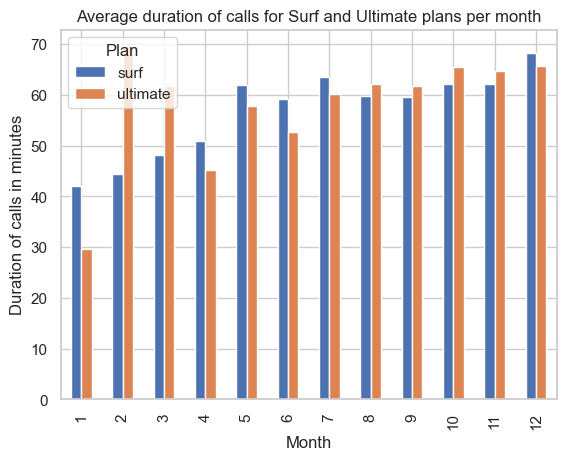

In [139]:
import matplotlib.pyplot as plt

# Reset the index to make 'month' and 'plan' columns
merged_calls = merged_calls.reset_index()

# Pivot the data for easier plotting
pivot_calls = merged_calls.pivot(index='month', columns='plan', values='call_total_minutes')

pivot_calls.plot(kind='bar',
                 title='Average duration of calls for Surf and Ultimate plans per month',
                 xlabel='Month',
                 ylabel='Duration of calls in minutes')

plt.legend(title='Plan')
plt.show()

In [140]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

merged_calls2=merged3.groupby(['month','plan'])['call_total_minutes'].sum()

merged_calls2

month  plan    
1      surf           42
       ultimate       89
2      surf          222
       ultimate      347
3      surf          770
       ultimate      433
4      surf         1782
       ultimate      724
5      surf         3280
       ultimate     1216
6      surf         4141
       ultimate     1946
7      surf         5658
       ultimate     2826
8      surf         7126
       ultimate     3541
9      surf         8769
       ultimate     4380
10     surf        11249
       ultimate     5761
11     surf        13537
       ultimate     6597
12     surf        16816
       ultimate     8204
Name: call_total_minutes, dtype: int64

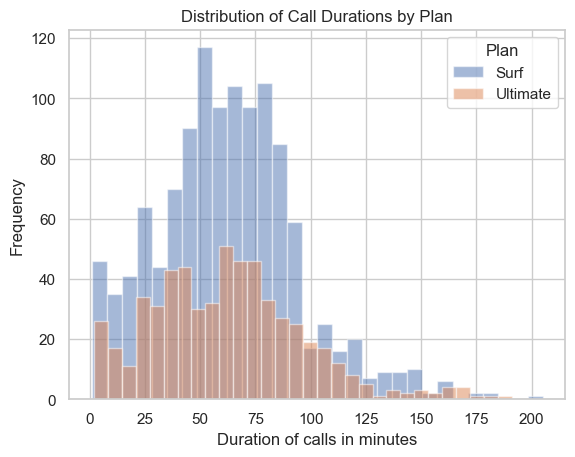

In [141]:
import matplotlib.pyplot as plt

# Filter data by plan
surf_minutes = merged3[merged3['plan'] == 'surf']['call_total_minutes']
ultimate_minutes = merged3[merged3['plan'] == 'ultimate']['call_total_minutes']

# Plot histograms
plt.hist(surf_minutes, bins=30, alpha=0.5, label='Surf')
plt.hist(ultimate_minutes, bins=30, alpha=0.5, label='Ultimate')

# Add title and labels
plt.title('Distribution of Call Durations by Plan')
plt.xlabel('Duration of calls in minutes')
plt.ylabel('Frequency')

# Add legend
plt.legend(title='Plan')
plt.show()

In [142]:
# Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.
## Calculate the mean and the variance of the monthly call duration


# Calculate the mean and variance of 'total_minutes'
call_mean_var = merged3.groupby('plan')['call_total_minutes'].agg(['mean', 'var']).reset_index()

#print(call_mean_var)

# Rename columns
call_mean_var.columns = ['plan', 'mean_call_duration', 'variance_call_duration']


print(call_mean_var)

       plan  mean_call_duration  variance_call_duration
0      surf           62.196610             1025.504993
1  ultimate           62.286701             1187.969563


In [143]:
# Plot a boxplot to visualize the distribution of the monthly call duration

# Ensure only necessary columns are considered
calls_box = merged3[['plan', 'call_total_minutes']]

# Display the first few rows to verify
print(calls_box.head())

       plan  call_total_minutes
0  ultimate                  16
1      surf                  27
2      surf                  49
3      surf                  65
4      surf                  64


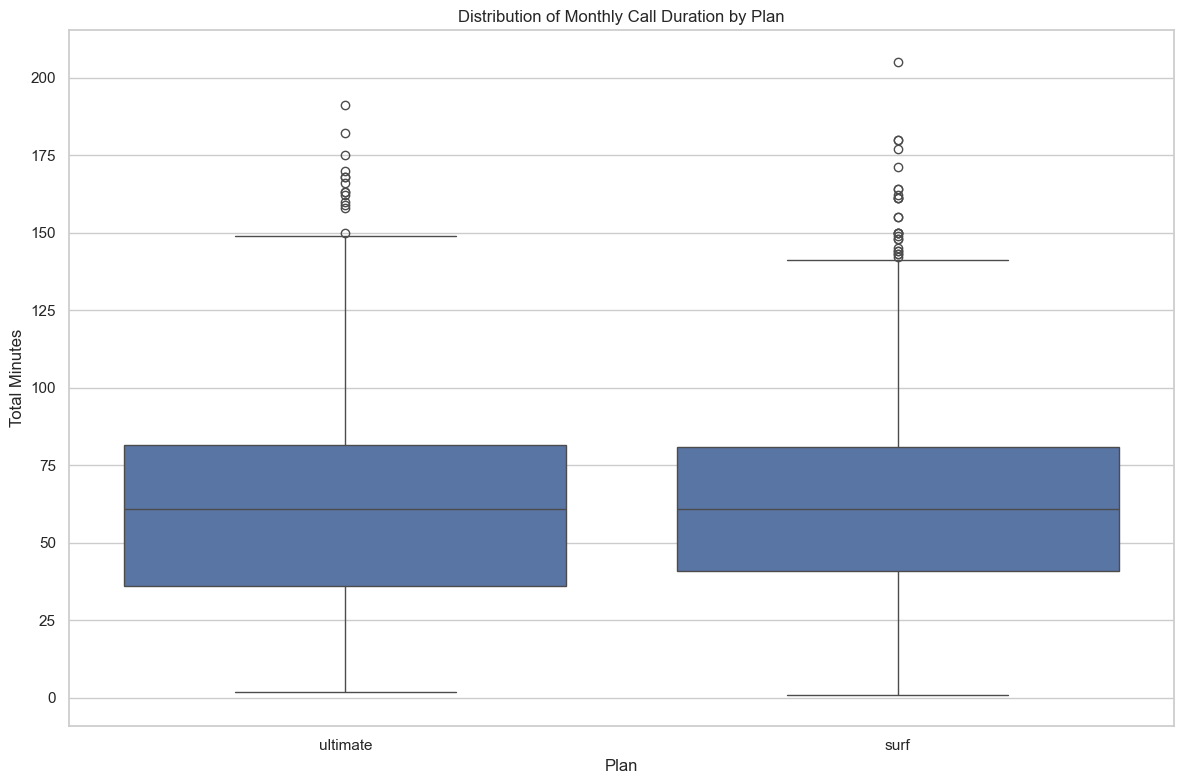

In [144]:

# Set aesthetics for the plot
sns.set(style="whitegrid")

# Create boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=calls_box, x='plan', y='call_total_minutes')

# Add titles and labels
plt.title('Distribution of Monthly Call Duration by Plan')
plt.xlabel('Plan')
plt.ylabel('Total Minutes')


plt.tight_layout()
plt.show()

#####  Is user behaviour different between the plans?

The call duration behavior seems similar between the two plans, as shown by the similar box sizes and median positions. However, the ultimate plan seems to accommodate some users who make exceptionally long calls, as shown by the extreme outliers at the end of the plot. There is one outlier in surf that is on the exctreme end. Despite some variations in the plots, the overall calling behavior doesn't seem drastically different between the two plans for the majority of users. 

#### 4.2) Messages dataframe

In [145]:
# Compare the number of messages users of each plan tend to send each month

# Group by 'plan' to calculate the mean and variance of 'messages_count'
messages_mean_var = merged3.groupby('plan')['number_messages'].agg(['mean', 'var']).reset_index()
messages_mean_var.columns = ['plan', 'mean_messages', 'variance_messages']

print(messages_mean_var)

       plan  mean_messages  variance_messages
0      surf      39.489831        1044.217878
1  ultimate      46.455959        1084.393818


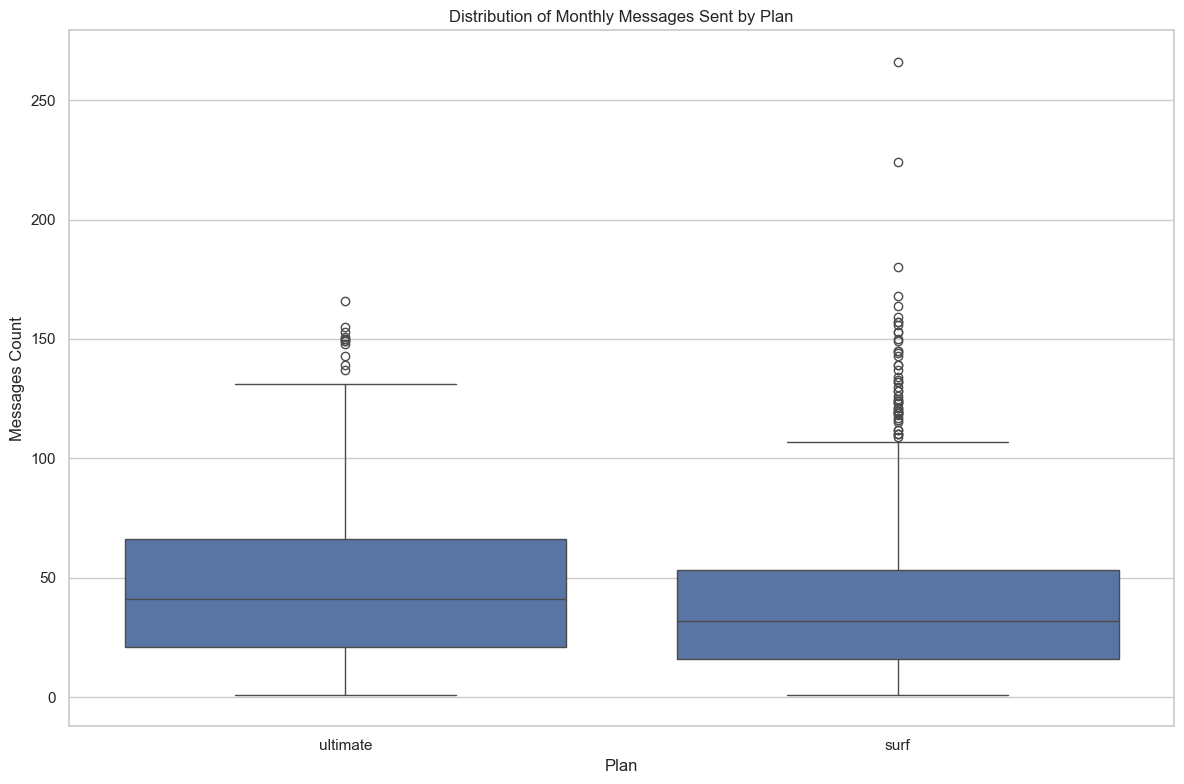

In [146]:


# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged3, x='plan', y='number_messages')

# Add titles and labels
plt.title('Distribution of Monthly Messages Sent by Plan')
plt.xlabel('Plan')
plt.ylabel('Messages Count')

plt.tight_layout()
plt.show()


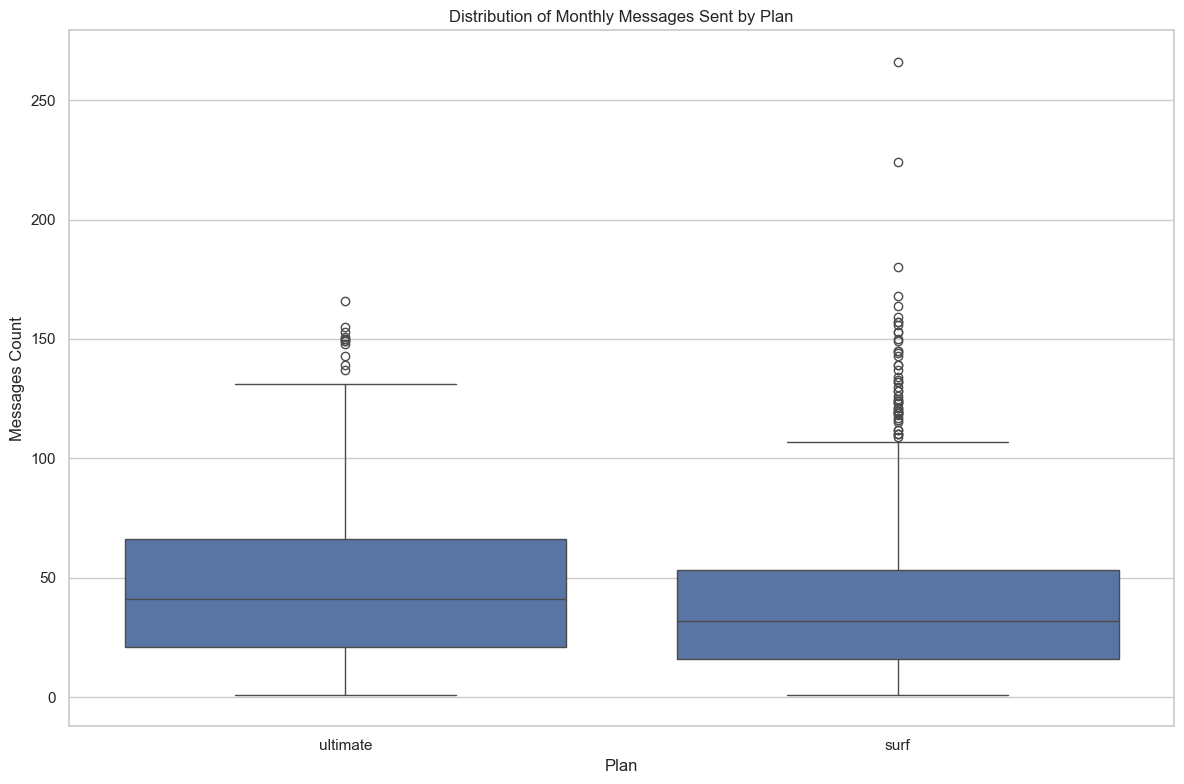

In [ ]:


# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged3, x='plan', y='number_messages')

# Add titles and labels
plt.title('Distribution of Monthly Messages Sent by Plan')
plt.xlabel('Plan')
plt.ylabel('Messages Count')

plt.tight_layout()
plt.show()


#####  Is user behaviour different between the plans?

The ultimate plan has more users who send more messages than the surf plan. The median position is higher for ultimate than surf and is longer, which suggests wider variation in messages sent. There are some users in suf plan who are outliers and send many messages compared to ultimate. 


#### 4.3) Internet dataframe

In [147]:
# Compare the amount of internet traffic consumed by users per plan

In [148]:
# Group by 'plan' to calculate the mean and variance of 'total_mb_used'
internet_mean_var = merged3.groupby('plan')['mb_used'].agg(['mean', 'var']).reset_index()

# Rename columns for clarity
internet_mean_var.columns = ['plan', 'mean_internet_usage', 'variance_internet_usage']

# Display the results
print(internet_mean_var)

       plan  mean_internet_usage  variance_internet_usage
0      surf            45.666949               388.415701
1  ultimate            46.215889               304.716287


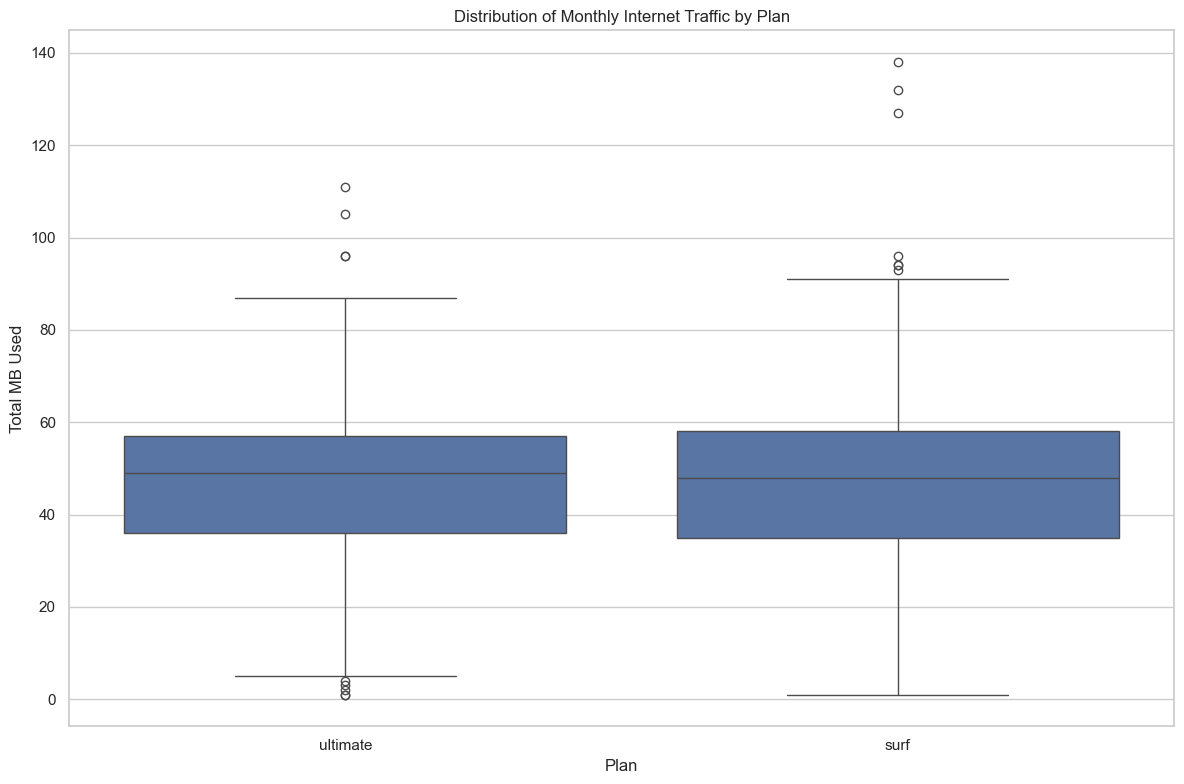

In [149]:


# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged3, x='plan', y='mb_used')

# Add titles and labels
plt.title('Distribution of Monthly Internet Traffic by Plan')
plt.xlabel('Plan')
plt.ylabel('Total MB Used')

# Display the plot
plt.tight_layout()
plt.show()

#####  Is user behaviour different between the plans in terms of internet traffic?

The internet traffic is somewhat similar between the plans. Howeverm, the median is slightly higher for ultimate plan. There are more outliers in surf plan suggetsing taht there are some users who use a lot of internet data.

#### 4.4) Revenue dataframe

In [150]:
# Compare the amount of revenue consumed by users per plan
merged3

,user_id,month,number_calls,call_total_minutes,number_messages,mb_used,first_name,last_name,age,city,reg_date,plan,churn_date,state_info
0,1000,12,16,16,11,5,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA MSA
1,1001,8,27,27,30,25,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,WA MSA
2,1001,9,49,49,44,53,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,WA MSA
3,1001,10,65,65,53,56,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,WA MSA
4,1001,11,64,64,36,51,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,WA MSA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,1496,9,52,52,21,51,Ariel,Shepherd,49,New Orleans-Metairie,2018-02-20,surf,NaT,LA MSA
1755,1496,10,46,46,18,54,Ariel,Shepherd,49,New Orleans-Metairie,2018-02-20,surf,NaT,LA MSA
1756,1496,11,39,39,13,40,Ariel,Shepherd,49,New Orleans-Metairie,2018-02-20,surf,NaT,LA MSA
1757,1496,12,40,40,11,53,Ariel,Shepherd,49,New Orleans-Metairie,2018-02-20,surf,NaT,LA MSA


In [151]:
# Calculate the monthly revenue for each user

# Select only necessary columns 
revenue_data = merged3[['user_id', 'plan', 'month', 'call_total_minutes', 'number_messages', 'mb_used']]

# the plans of the services in dictionary
plans = {
    'surf': {'usd_per_minute': 0.03,
             'usd_per_message': 0.03,
             'usd_per_gb': 10,
             'usd_monthly_pay': 20,
             'minutes_included': 500,
             'mb_per_month_included': 15360,
             'messages_included': 50
            },
    'ultimate': {'usd_per_minute': 0.01,
                 'usd_per_message': 0.01,
                 'usd_per_gb': 7,
                 'usd_monthly_pay': 70,
                 'minutes_included': 3000,
                 'mb_per_month_included': 30720,
                 'messages_included': 1000
                }
}

# use function to calculate revenue

def monthly_revenue(row):
    plan = plans[row['plan']]
    minutes_charges = row['call_total_minutes'] - plan['minutes_included']
    messages_charges = row['number_messages'] - plan['messages_included']
    internet_charges = row['mb_used'] - plan['mb_per_month_included']
                       
    call_cost = max(minutes_charges, 0) * plan['usd_per_minute']
    message_cost = max(messages_charges, 0) * plan['usd_per_message']
    internet_cost = max(internet_charges, 0) * plan['usd_per_gb']
    total_cost = call_cost + message_cost + internet_cost + plan['usd_monthly_pay']
                        
    return total_cost

revenue_data['monthly_revenue'] = revenue_data.apply(monthly_revenue, axis=1)

C:\Users\candi\AppData\Local\Temp\ipykernel_19076\1797658400.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_data['monthly_revenue'] = revenue_data.apply(monthly_revenue, axis=1)


In [152]:
revenue_data

,user_id,plan,month,call_total_minutes,number_messages,mb_used,monthly_revenue
0,1000,ultimate,12,16,11,5,70.00
1,1001,surf,8,27,30,25,20.00
2,1001,surf,9,49,44,53,20.00
3,1001,surf,10,65,53,56,20.09
4,1001,surf,11,64,36,51,20.00
...,...,...,...,...,...,...,...
1754,1496,surf,9,52,21,51,20.00
1755,1496,surf,10,46,18,54,20.00
1756,1496,surf,11,39,13,40,20.00
1757,1496,surf,12,40,11,53,20.00


In [153]:
# Group by 'plan' to calculate the mean and variance of 'monthly_revenue'
revenue_mean_var = revenue_data.groupby('plan')['monthly_revenue'].agg(['mean', 'var']).reset_index()

# Rename columns for clarity
revenue_mean_var.columns = ['plan', 'mean_revenue', 'variance_revenue']

print(revenue_mean_var)

       plan  mean_revenue  variance_revenue
0      surf     20.257314          0.395499
1  ultimate     70.000000          0.000000


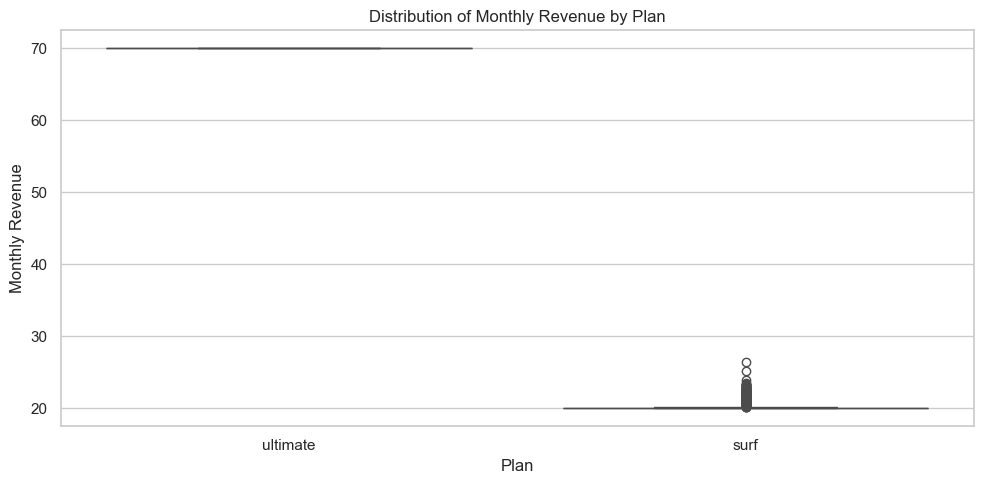

In [154]:

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=revenue_data, x='plan', y='monthly_revenue')

# Add titles and labels
plt.title('Distribution of Monthly Revenue by Plan')
plt.xlabel('Plan')
plt.ylabel('Monthly Revenue')

# Display the plot
plt.tight_layout()
plt.show()

##### How does the revenue differs between the plans.

On average, the ultimate plan has a much higher monthly revenue compared to surf plan. The surf plan has a few outliers who seem to spend more mor eon their account than average users.

#### 5) Test statistical hypotheses

Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.
Formulate two-tailed hypotheses:

* Null Hypothesis (H0): The average revenue from users of the Ultimate and Surf calling plans are equal.
* Alternative Hypothesis (H1): The average revenue from users of the Ultimate and Surf calling plans are not equal.

In [155]:

# Filter data for ultimate and surf plan revenue
ultimate_revenue = revenue_data[revenue_data['plan'] == 'ultimate']['monthly_revenue']
surf_revenue = revenue_data[revenue_data['plan'] == 'surf']['monthly_revenue']

print("Ultimate Plan Revenue:")
print(ultimate_revenue.describe())

print("\nSurf Plan:")
print(surf_revenue.describe())

Ultimate Plan Revenue:
count    579.0
mean      70.0
std        0.0
min       70.0
25%       70.0
50%       70.0
75%       70.0
max       70.0
Name: monthly_revenue, dtype: float64

Surf Plan:
count    1180.000000
mean       20.257314
std         0.628887
min        20.000000
25%        20.000000
50%        20.000000
75%        20.090000
max        26.480000
Name: monthly_revenue, dtype: float64


In [156]:
# Test the hypotheses

# Two-sample t-test
t_stat, p_value = st.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

alpha = 0.05 ## There is a 5% risk of concluding that an observed difference exists when there is no actual difference.

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average revenue between Ultimate and Surf plans.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average revenue between Ultimate and Surf plans.")


T-statistic: 2717.048699950823
P-value: 0.0
Reject the null hypothesis: There is a significant difference in average revenue between Ultimate and Surf plans.


c:\Users\candi\anaconda3\envs\sklearn-env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.


Formulate two-tailed hypotheses:

* Null Hypothesis (H0): The average revenue from users in the NY-NJ area and all other regions in the US are equal.
* Alternative Hypothesis (H1): The average revenue from users in the NY-NJ area and other regions in the US are not equal.

In [157]:
# merge revenue_data and users data frames to get 'city'
revenue_data2= revenue_data.merge(users, on='user_id')

# Filter data for NY-NJ area and all other regions in US
ny_nj_revenue = revenue_data2[revenue_data2['city'] == 'New York-Newark-Jersey City']['monthly_revenue']
other_regions_revenue = revenue_data2[revenue_data2['city'] != 'New York-Newark-Jersey City']['monthly_revenue']

print("NY-NJ Region Revenue Statistics:")
print(ny_nj_revenue.describe())

print("\nOther Regions Revenue Statistics:")
print(other_regions_revenue.describe())

NY-NJ Region Revenue Statistics:
count    279.000000
mean      31.033835
std       20.651751
min       20.000000
25%       20.000000
50%       20.000000
75%       21.215000
max       70.000000
Name: monthly_revenue, dtype: float64

Other Regions Revenue Statistics:
count    1480.000000
mean       37.685939
std        23.726225
min        20.000000
25%        20.000000
50%        20.270000
75%        70.000000
max        70.000000
Name: monthly_revenue, dtype: float64


In [158]:
# Test the hypotheses:

# Perform the two-sample t-test
t_stat, p_value = st.ttest_ind(ny_nj_revenue, other_regions_revenue, equal_var=False)

# Display the test results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Define the alpha value
alpha = 0.05

# Determine whether to reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average revenue between NY-NJ area and other regions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average revenue between NY-NJ area and other regions.")

T-statistic: -4.814533971083261
P-value: 2.049151090542024e-06
Reject the null hypothesis: There is a significant difference in average revenue between NY-NJ area and other regions.


The p-value is less than alpha so we can reject the null hypothesis and conclude there is a statistically signifincat difference in revenue between NY-NJ are and other regions.


### General conclusion

In terms of the plans, there is a significant difference in average revenue between Ultimate and Surf plans. The Ultimate plan has a higher monthly revenue than the surf plan.

There is also a significant diffence between regions. Other regions seem to have a hgher monthly revenue than the NY-NJ area.


